# ORIE 3120

Jeremy Ben-Meir (jsb459), Sunny Chavan (), Steven Urdaneta ()

Monday, April 18, 2022

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import gender_guesser.detector as gender

Import relevant data

In [121]:
listings_df = pd.read_csv("listings.csv")
listings_df["last_review"] = listings_df["last_review"].astype('datetime64[ns]')
listings_df.head()

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.33,3,338,0,NaN
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,75,1,409,2021-10-22,4.86,1,194,32,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.52,2,365,0,NaN
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,2021-08-08,0.02,1,123,1,NaN
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,507,2021-11-08,3.68,1,192,33,NaN


In [122]:
neighbourhoods_df = pd.read_csv("neighbourhoods.csv")
neighbourhoods_df.head()

,neighbourhood_group,neighbourhood
0,Bronx,Allerton
1,Bronx,Baychester
2,Bronx,Belmont
3,Bronx,Bronxdale
4,Bronx,Castle Hill


In [123]:
reviews_df = pd.read_csv("reviews.csv")
reviews_df.head()

,listing_id,date
0,2595,2009-11-21
1,2595,2009-12-05
2,2595,2009-12-10
3,2595,2010-04-09
4,2595,2010-05-25


Plot fields

KeyboardInterrupt: 

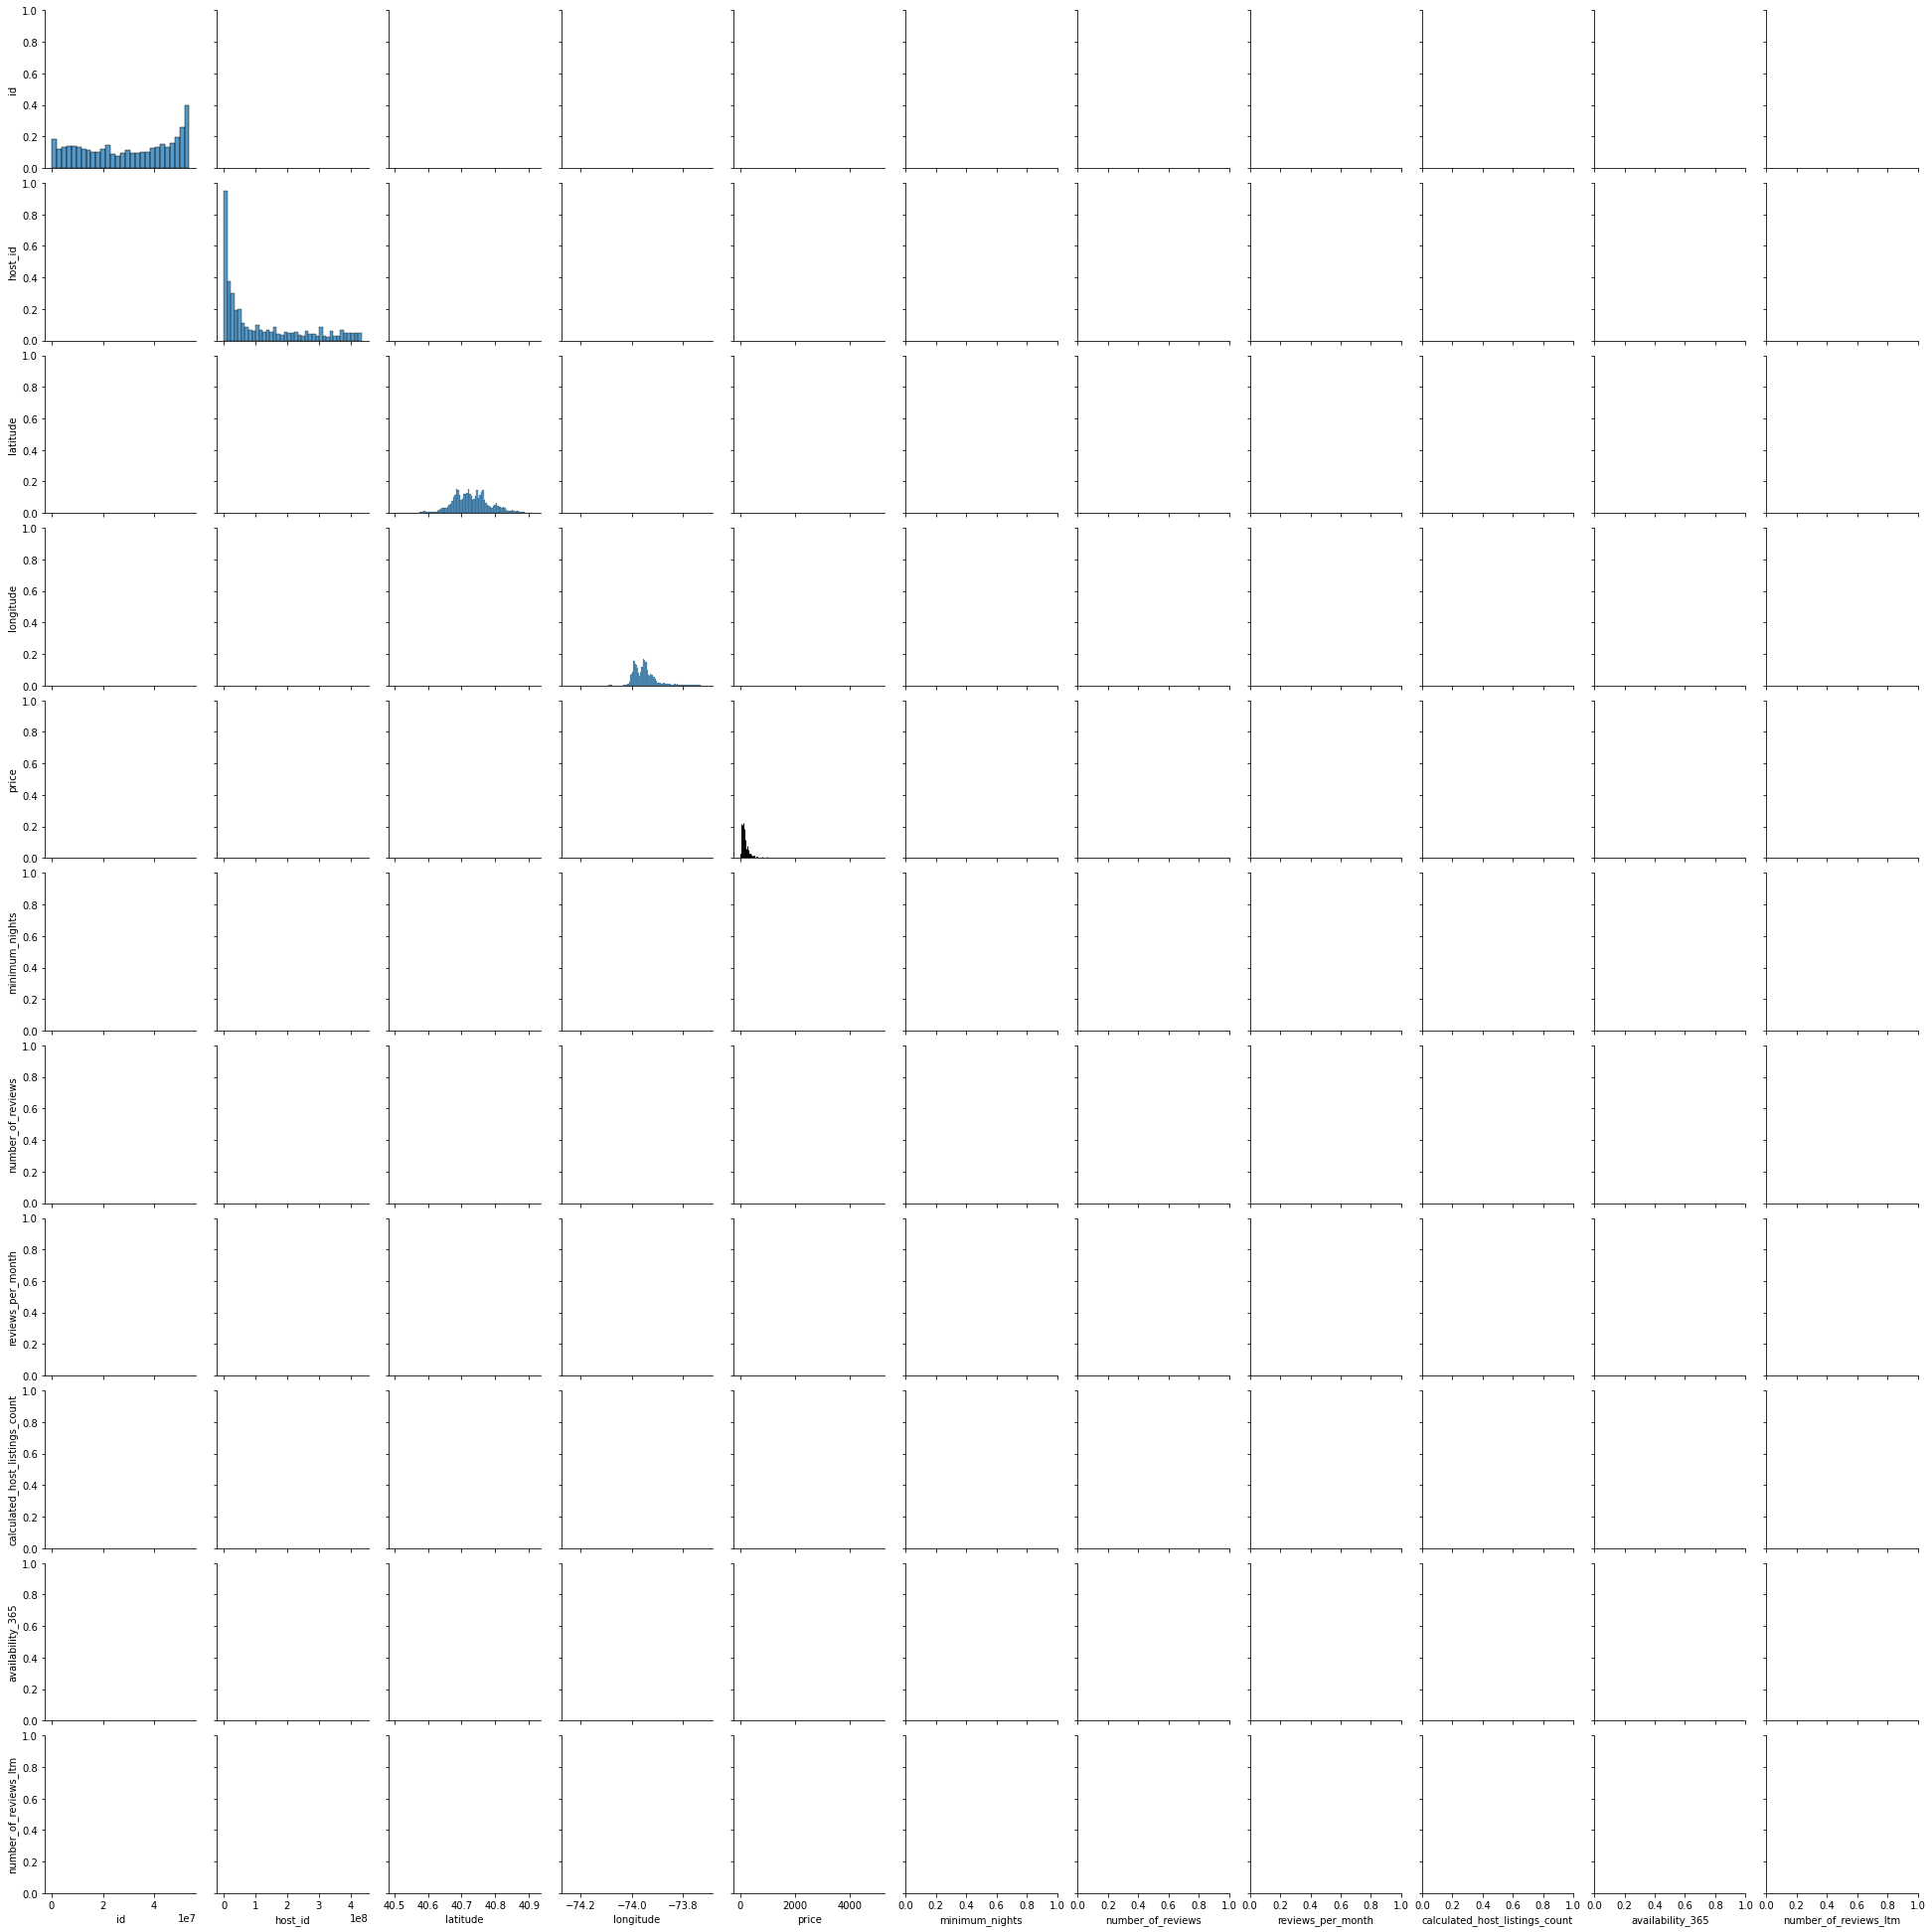

In [124]:
sns.pairplot(listings_df)

Not all of these relationships are interesting...

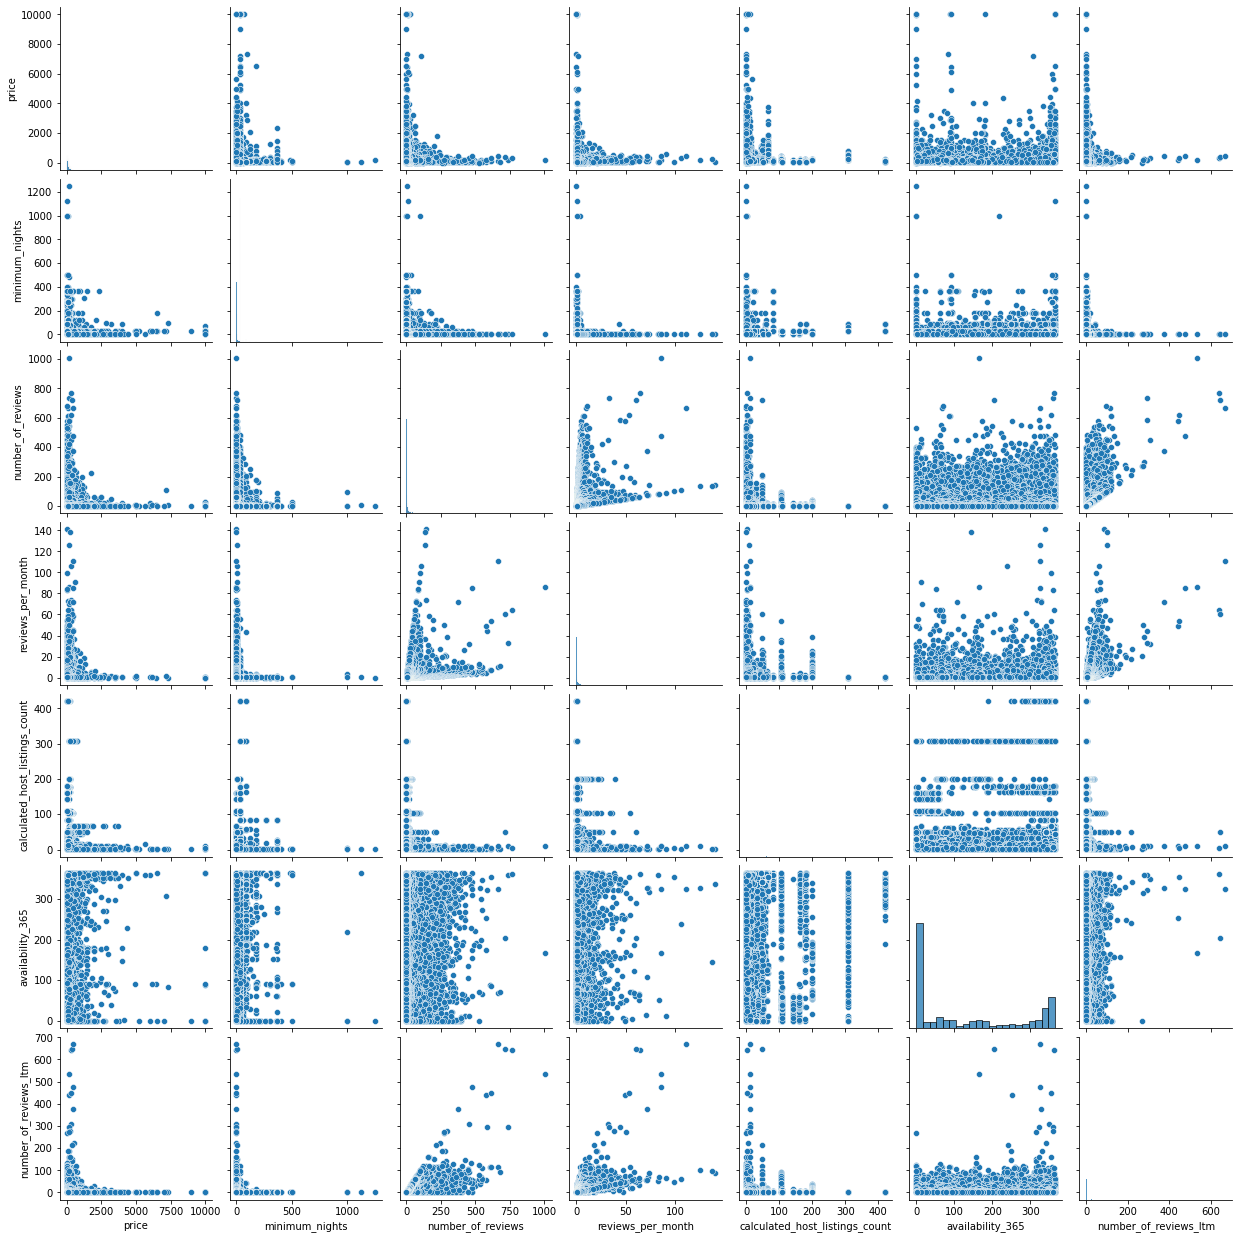

In [ ]:
listings_df_limited = listings_df.drop(["id","latitude","longitude","host_id"],axis=1)
sns.pairplot(listings_df_limited)

One-on-one relationships

Text(0, 0.5, 'number_of_reviews')

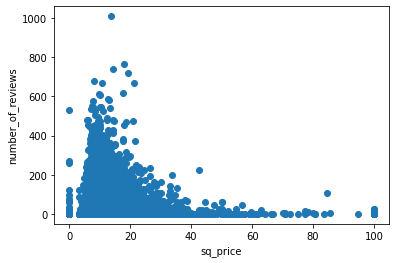

In [ ]:
listings_df["sq_price"] = listings_df["price"] 
plt.scatter(listings_df["sq_price"],listings_df["number_of_reviews"])
plt.xlabel("sq_price")
plt.ylabel("number_of_reviews")

Text(0, 0.5, 'number_of_reviews')

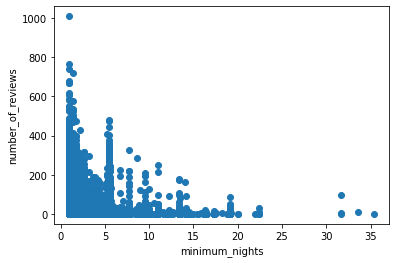

In [ ]:
listings_df["sq_minimum_nights"] = listings_df["minimum_nights"].pow(1/2)
plt.scatter(listings_df["sq_minimum_nights"],listings_df["number_of_reviews"])
plt.xlabel("minimum_nights")
plt.ylabel("number_of_reviews")

Text(0, 0.5, 'minimum_nights')

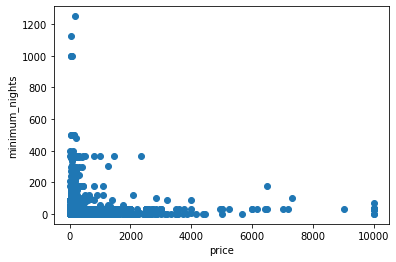

In [ ]:
plt.scatter(listings_df["price"],listings_df["minimum_nights"])
plt.xlabel("price")
plt.ylabel("minimum_nights")

Plotting categorical variables & date

In [ ]:
print(listings_df["neighbourhood_group"].unique())
print(listings_df["room_type"].unique())

['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']
['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']


<AxesSubplot:title={'center':'number_of_reviews'}, xlabel='gender'>

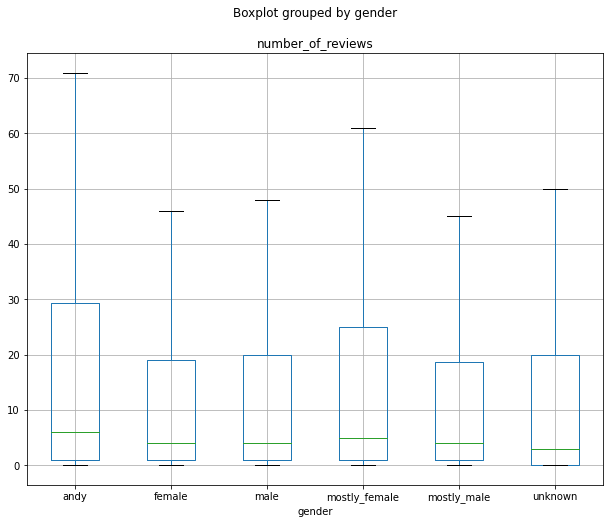

In [156]:
d = gender.Detector()
listings_df["gender"] = listings_df["host_name"].apply(lambda x : d.get_gender(x))

fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
listings_df.boxplot(column='number_of_reviews',by="gender",ax=ax,showfliers=False)

Text(0, 0.5, 'price')

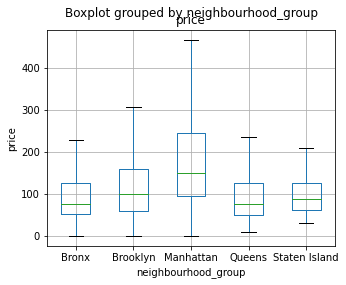

In [159]:
fig, ax = plt.subplots(figsize=(5,4))
plt.suptitle('')
listings_df.boxplot(column='price',by="neighbourhood_group",ax=ax,showfliers=False)
plt.ylabel("price")

Text(0, 0.5, 'number_of_reviews')

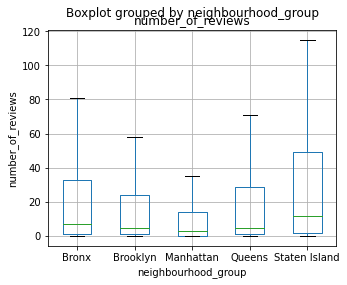

In [162]:
fig, ax = plt.subplots(figsize=(5,4))
plt.suptitle('')
listings_df.boxplot(column='number_of_reviews',by="neighbourhood_group",ax=ax,showfliers=False)
plt.ylabel("number_of_reviews")

Text(0, 0.5, 'last_review')

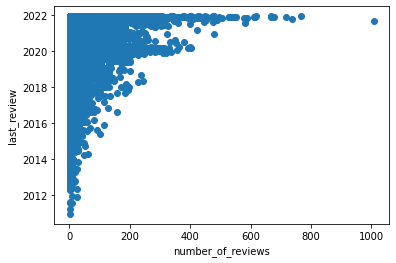

In [128]:
plt.scatter(listings_df["number_of_reviews"],listings_df["last_review"])
plt.xlabel("number_of_reviews")
plt.ylabel("last_review")